<h1 align=center><font size = 5>Battle of Neighborhoods</font></h1>


##### The data used in this project is from ('https://en.wikipedia.org/wiki/List_of_counties_in_Pennsylvania'), showing the county, popuplation and  land mass area of the states. Kindly follow through and also the foursquare location 



In [228]:
import numpy as np
import pandas as pd
import requests
import html5lib
from bs4 import BeautifulSoup
import json

from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

In [229]:
uri = 'https://en.wikipedia.org/wiki/List_of_counties_in_Pennsylvania'
pg = requests.get(uri).text
soup = BeautifulSoup(pg, 'lxml')
tbl = soup.find('table')

In [230]:
df = pd.read_html(str(tbl))[0]
df.columns = df.iloc[0]
df = df[1:]
df.rename({"County": "County"}, axis=1, inplace=True)

In [231]:
print(df)

0          Adams County    1   Gettysburg  1800  \
1      Allegheny County    3   Pittsburgh  1788   
2      Armstrong County    5   Kittanning  1800   
3         Beaver County    7       Beaver  1800   
4        Bedford County    9      Bedford  1771   
5          Berks County   11      Reading  1752   
..                  ...  ...          ...   ...   
62    Washington County  125   Washington  1781   
63         Wayne County  127    Honesdale  1798   
64  Westmoreland County  129   Greensburg  1773   
65       Wyoming County  131  Tunkhannock  1842   
66          York County  133         York  1749   

0                               Parts of York County.  \
1      Parts of Washington and Westmoreland Counties.   
2   Parts of Allegheny, Lycoming, and Westmoreland...   
3         Parts of Allegheny and Washington Counties.   
4                         Parts of Cumberland County.   
5   Parts of Chester, Lancaster and Philadelphia C...   
..                                           

In [232]:
print(tbl.tr.text)


County

FIPS code[4]

County seat[5]

Est.[5]

Origin


Etymology[6]

Population[7]

Area[5]

Map



In [233]:
df.columns = ["County","FIPS","county seat","est","origin","etymology","population","area","map"]

In [234]:
df

,County,FIPS,county seat,est,origin,etymology,population,area,map
1,Allegheny County,3,Pittsburgh,1788,Parts of Washington and Westmoreland Counties.,"Delaware word for the Allegheny River, which p...",1223348,"745 sq mi(1,930 km2)",NaN
2,Armstrong County,5,Kittanning,1800,"Parts of Allegheny, Lycoming, and Westmoreland...","John Armstrong, Revolutionary War general",68941,"664 sq mi(1,720 km2)",NaN
3,Beaver County,7,Beaver,1800,Parts of Allegheny and Washington Counties.,"Beaver River, itself named for the eponymous a...",170539,"444 sq mi(1,150 km2)",NaN
4,Bedford County,9,Bedford,1771,Parts of Cumberland County.,"Fort Bedford, which is named for John Russell,...",49762,"1,015 sq mi(2,629 km2)",NaN
5,Berks County,11,Reading,1752,"Parts of Chester, Lancaster and Philadelphia C...",The English county of Berkshire,411442,"866 sq mi(2,243 km2)",NaN
...,...,...,...,...,...,...,...,...,...
62,Washington County,125,Washington,1781,Parts of Westmoreland County.,"George Washington, first U.S. President",207820,"861 sq mi(2,230 km2)",NaN
63,Wayne County,127,Honesdale,1798,Parts of Northampton County.,"Anthony Wayne, Revolutionary War general",52822,"751 sq mi(1,945 km2)",NaN
64,Westmoreland County,129,Greensburg,1773,Parts of Bedford County.,The historic English county of Westmorland,365169,"1,036 sq mi(2,683 km2)",NaN
65,Wyoming County,131,Tunkhannock,1842,Parts of Luzerne County.,"The Delaware word xwéːwaməŋk, meaning ""at the ...",28276,"405 sq mi(1,049 km2)",NaN


In [235]:
indexNames = df[df['County']== ''].index
df.drop(indexNames , inplace=True)

In [236]:
df.head(10)

,County,FIPS,county seat,est,origin,etymology,population,area,map
1,Allegheny County,3,Pittsburgh,1788,Parts of Washington and Westmoreland Counties.,"Delaware word for the Allegheny River, which p...",1223348,"745 sq mi(1,930 km2)",NaN
2,Armstrong County,5,Kittanning,1800,"Parts of Allegheny, Lycoming, and Westmoreland...","John Armstrong, Revolutionary War general",68941,"664 sq mi(1,720 km2)",NaN
3,Beaver County,7,Beaver,1800,Parts of Allegheny and Washington Counties.,"Beaver River, itself named for the eponymous a...",170539,"444 sq mi(1,150 km2)",NaN
4,Bedford County,9,Bedford,1771,Parts of Cumberland County.,"Fort Bedford, which is named for John Russell,...",49762,"1,015 sq mi(2,629 km2)",NaN
5,Berks County,11,Reading,1752,"Parts of Chester, Lancaster and Philadelphia C...",The English county of Berkshire,411442,"866 sq mi(2,243 km2)",NaN
6,Blair County,13,Hollidaysburg,1846,Parts of Huntingdon and Bedford Counties.,"John Blair, Pennsylvania state legislator",127089,"527 sq mi(1,365 km2)",NaN
7,Bradford County,15,Towanda,1810,Parts of Luzerne and Lycoming Counties; origin...,"William Bradford, second U.S. Attorney General",62622,"1,161 sq mi(3,007 km2)",NaN
8,Bucks County,17,Doylestown,1682,One of the original counties at the formation ...,The English county of Buckinghamshire,625249,"622 sq mi(1,611 km2)",NaN
9,Butler County,19,Butler,1800,Parts of Allegheny County.,"Richard Butler, Revolutionary War general",183862,"795 sq mi(2,059 km2)",NaN
10,Cambria County,21,Ebensburg,1804,Parts of Somerset and Huntingdon Counties.,"Cambria, the traditional name for Wales",143679,"693 sq mi(1,795 km2)",NaN


In [237]:
df.head(10)

,County,FIPS,county seat,est,origin,etymology,population,area,map
1,Allegheny County,3,Pittsburgh,1788,Parts of Washington and Westmoreland Counties.,"Delaware word for the Allegheny River, which p...",1223348,"745 sq mi(1,930 km2)",NaN
2,Armstrong County,5,Kittanning,1800,"Parts of Allegheny, Lycoming, and Westmoreland...","John Armstrong, Revolutionary War general",68941,"664 sq mi(1,720 km2)",NaN
3,Beaver County,7,Beaver,1800,Parts of Allegheny and Washington Counties.,"Beaver River, itself named for the eponymous a...",170539,"444 sq mi(1,150 km2)",NaN
4,Bedford County,9,Bedford,1771,Parts of Cumberland County.,"Fort Bedford, which is named for John Russell,...",49762,"1,015 sq mi(2,629 km2)",NaN
5,Berks County,11,Reading,1752,"Parts of Chester, Lancaster and Philadelphia C...",The English county of Berkshire,411442,"866 sq mi(2,243 km2)",NaN
6,Blair County,13,Hollidaysburg,1846,Parts of Huntingdon and Bedford Counties.,"John Blair, Pennsylvania state legislator",127089,"527 sq mi(1,365 km2)",NaN
7,Bradford County,15,Towanda,1810,Parts of Luzerne and Lycoming Counties; origin...,"William Bradford, second U.S. Attorney General",62622,"1,161 sq mi(3,007 km2)",NaN
8,Bucks County,17,Doylestown,1682,One of the original counties at the formation ...,The English county of Buckinghamshire,625249,"622 sq mi(1,611 km2)",NaN
9,Butler County,19,Butler,1800,Parts of Allegheny County.,"Richard Butler, Revolutionary War general",183862,"795 sq mi(2,059 km2)",NaN
10,Cambria County,21,Ebensburg,1804,Parts of Somerset and Huntingdon Counties.,"Cambria, the traditional name for Wales",143679,"693 sq mi(1,795 km2)",NaN


In [238]:
df = df.drop(df.columns[[1,2,3,4,5,8]], axis=1)

In [239]:
df.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

,County,population,area
1,Allegheny County,1223348,"745 sq mi(1,930 km2)"
2,Armstrong County,68941,"664 sq mi(1,720 km2)"
3,Beaver County,170539,"444 sq mi(1,150 km2)"
4,Bedford County,49762,"1,015 sq mi(2,629 km2)"
5,Berks County,411442,"866 sq mi(2,243 km2)"
6,Blair County,127089,"527 sq mi(1,365 km2)"
7,Bradford County,62622,"1,161 sq mi(3,007 km2)"
8,Bucks County,625249,"622 sq mi(1,611 km2)"
9,Butler County,183862,"795 sq mi(2,059 km2)"
10,Cambria County,143679,"693 sq mi(1,795 km2)"


In [240]:
df[[0,1,2,3]]= df.area.str.split(expand=True)

In [241]:
df

,County,population,area,0,1,2,3
1,Allegheny County,1223348,"745 sq mi(1,930 km2)",745,sq,"mi(1,930",km2)
2,Armstrong County,68941,"664 sq mi(1,720 km2)",664,sq,"mi(1,720",km2)
3,Beaver County,170539,"444 sq mi(1,150 km2)",444,sq,"mi(1,150",km2)
4,Bedford County,49762,"1,015 sq mi(2,629 km2)","1,015",sq,"mi(2,629",km2)
5,Berks County,411442,"866 sq mi(2,243 km2)",866,sq,"mi(2,243",km2)
...,...,...,...,...,...,...,...
62,Washington County,207820,"861 sq mi(2,230 km2)",861,sq,"mi(2,230",km2)
63,Wayne County,52822,"751 sq mi(1,945 km2)",751,sq,"mi(1,945",km2)
64,Westmoreland County,365169,"1,036 sq mi(2,683 km2)","1,036",sq,"mi(2,683",km2)
65,Wyoming County,28276,"405 sq mi(1,049 km2)",405,sq,"mi(1,049",km2)


In [242]:
df = df.drop(df.columns[[2,4,5,6]], axis=1)

In [243]:
df

,County,population,0
1,Allegheny County,1223348,745
2,Armstrong County,68941,664
3,Beaver County,170539,444
4,Bedford County,49762,"1,015"
5,Berks County,411442,866
...,...,...,...
62,Washington County,207820,861
63,Wayne County,52822,751
64,Westmoreland County,365169,"1,036"
65,Wyoming County,28276,405


In [244]:
df.to_csv("test1.csv")

In [245]:
from urllib.request import urlopen
import bs4 as bs
labels = []
data = []
html = urlopen("https://data.pa.gov/Government-That-Works/County-Latitude-Longitude-Points-For-Each-County-S/dvjn-d63b/data").read()
print(html)

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en" xmlns:og="http://opengraphprotocol.org/schema/">\n\n\n  <!--\n  Powered by Socrata\n  http://www.socrata.com\n  -->\n\n  \n\n  <head>\n    <meta http-equiv="content-type" content="text/html;charset=utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n    <meta name="csrf-param" content="authenticity_token" />\n<meta name="csrf-token" content="hoA9gKWvckSzWLHb8ul2NLSM2gsJRDH/ZBEDtsajZL6tK4qwX/QhBAVHzGSdYyueXfRGsiC6zh6g+C5WOdcfYA==" />\n    \n<script>\n//<![CDATA[\nvar socrata = {"currentUser":null,"domain":"data.pa.gov","domain_id":"1920","environment":"production","featureFlags":{"notify_import_result":false,"in_dataset_search":"stop_cly_index","embetter_analytics_page":false,"visualization_canvas_embed_button":"always","tyler_privacy_policy":true,"enable_colocate_ui":false,"disp

In [246]:
soup=bs.BeautifulSoup(html,'lxml')
table = soup.find ('div', class_= 'socrata-table')
print (table)

None


In [247]:
PA_data = pd.read_excel('PA_log_lat.xlsx')

In [248]:
PA_data.head()

,County,population,Size,Longitude,Latitude
0,Allegheny,1223348,745,-79.986198,40.815095
1,Armstrong,68941,664,-79.473169,40.683492
2,Beaver,170539,444,-80.351074,40.007375
3,Bedford,49762,1015,-78.491165,40.419396
4,Berks,411442,866,-75.930773,40.485550


In [249]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [250]:
address = 'Philadephia, Pa'

geolocator = Nominatim(user_agent="Philadelphia")
location = geolocator.geocode(address)
latitude_Philadelphia = location.latitude
longitude_Philadelphia = location.longitude
print('The geograpical coordinate of Philadelphia are {}, {}.'.format(latitude_Philadelphia, longitude_Philadelphia))

The geograpical coordinate of Philadelphia are 39.9860268, -75.2500987.


In [264]:
uri = 'https://www.redfin.com/city/15502/PA/Philadelphia/land'
pg = requests.get(uri).text
soup = BeautifulSoup(pg, 'lxml')
tbl = soup.find('tbody')

<!DOCTYPE html5>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <script src="https://www.google.com/recaptcha/api.js">
  </script>
  <style type="text/css">
   #submit {
        -webkit-border-radius: 4;
        -moz-border-radius: 4;
        border-radius: 4px;
        font-family: Arial;
        font-size: 16px;
        background: #0c82a5;
        padding: 7px 10px 7px 10px;
        text-decoration: none;
        color: #ffffff;
        border: none;
    }

    #submit:hover {
        background: #3cb0fd;
        text-decoration: none;
    }

    body {
        font-family: Arial,"Helvetica Neue",Helvetica,sans-serif;
        margin: 0;
    }
    div#header {
        height: 59px;
        width: 100%;
        background-color: #fff;
        box-shadow: 0 0 1px rgba(0,0,0,.3);
    }

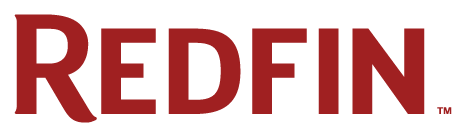

In [256]:


response_obj = requests.get('https://www.redfin.com/city/15502/PA/Philadelphia/land').text
#print (type (response_obj))
soup = BeautifulSoup(response_obj,'lxml')
print (soup.prettify())

In [1]:
CLIENT_ID = 'SCZ10UOVNVSBGM4GIICCGQXIZVRGYM1G2TJ3JOXUZEMMAFFA' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'NNWQ0CO0W1AWQDWHL5Q4WY3RWQTSNTP5SE3VTVECE0NFQXJ5' #'your-client-secret' # your Foursquare Secret
VERSION = '20190325' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: SCZ10UOVNVSBGM4GIICCGQXIZVRGYM1G2TJ3JOXUZEMMAFFA
My CLIENT_SECRET:NNWQ0CO0W1AWQDWHL5Q4WY3RWQTSNTP5SE3VTVECE0NFQXJ5


In [4]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://foursquare.com/v/zahav/4a5ebb16f964a52020bf1fe3'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)